Import the package and some example data:

In [1]:
import texpro as tp
import seaborn as sns

iris = sns.load_dataset('iris')

Initialise the TeXpro document directory:

In [2]:
tp.config.doc_path = 'texpro_demo/'
tp.config.make_folders()

Take a first look at the data and save the graph for use in LaTeX:

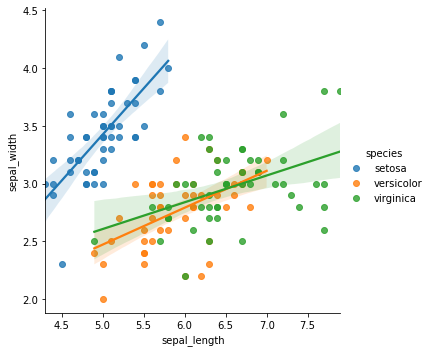

In [3]:
plot = tp.Plot(sns.lmplot(x='sepal_length', y='sepal_width', hue='species', data=iris))
tp.TexFigure('sepal_plot', plot, caption='Sepal Plot')

Looks like there is a relationship between sepal length and width.  Let’s test the relationship more formally using the following regression model:

In [4]:
tp.TexEquation('sepal_reg', r'sepal\_width_i = \alpha_i + \beta_i sepal\_length_i + \epsilon_i')

In [5]:
import statsmodels.formula.api as smf
est1 = smf.ols('sepal_width ~ 1 + sepal_length', iris).fit()

from stargazer.stargazer import Stargazer
tp.StargazerTable('sepal_reg', Stargazer([est1]), caption='Sepal regression')

Also, what is a sepal anyway?

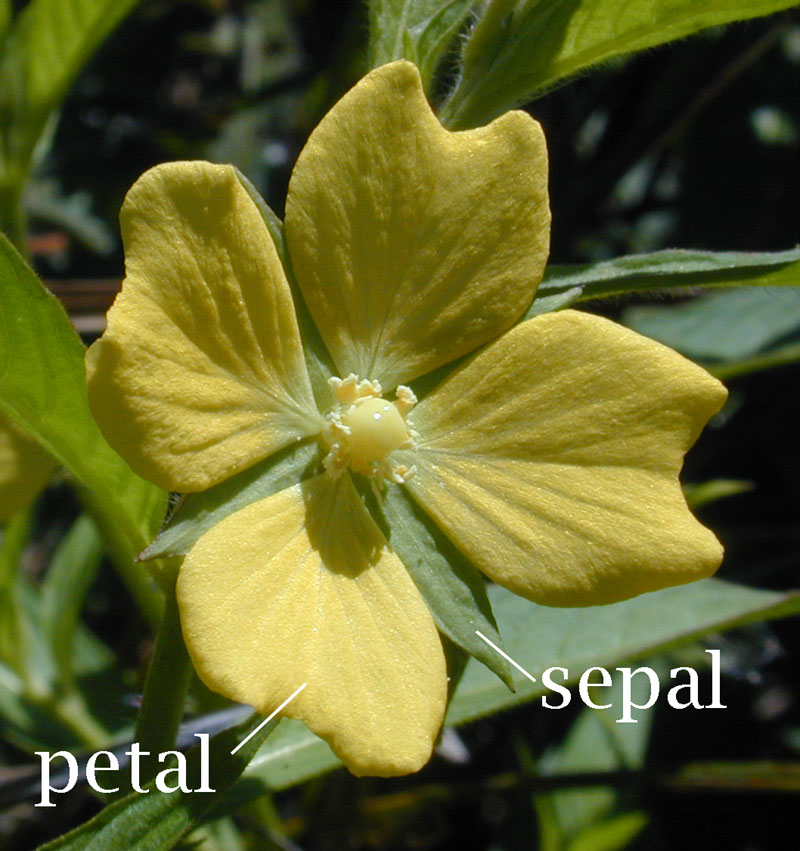

In [8]:
img = tp.Image(url='https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg')
tp.TexFigure('sepal_info', img)

TeXpro automatically creates all the required LaTeX files and places them in sensible folders:

In [7]:
print(tp.config.file_tree)


texpro_demo
├── eq
│   └── sepal_reg.tex
├── fig
│   ├── sepal_info.tex
│   └── sepal_plot.tex
├── img
│   ├── sepal_info.jpeg
│   ├── sepal_plot.pdf
│   └── {self.label}.{self.ext}
├── tab
│   └── sepal_reg.tex
└── texpro_demo.tex
